疫情数据多项式回归

MSE(d=1): 34412636.41762441
训练数据集得分(d=1)： 0.6034802438107509
测试数据集得分(d=1): -19.312063559034378
得分: 0.6034802438107509
------------------
MSE(d=2): 6154287.23765073
训练数据集得分(d=2)： 0.9290871979299419
测试数据集得分(d=2): -1.6490165320401151
得分: 0.9290871979299419
------------------
MSE(d=3): 386396.63180986675
训练数据集得分(d=3)： 0.9955477430912812
测试数据集得分(d=3): 0.8376326968621525
得分: 0.9955477430912812
------------------
MSE(d=4): 186480.4655458101
训练数据集得分(d=4)： 0.9978512780062846
测试数据集得分(d=4): 0.9253494050764826
得分: 0.9978512780062846
------------------
MSE(d=5): 167820.26417925392
训练数据集得分(d=5)： 0.9980662902595312
测试数据集得分(d=5): 0.9042253281042834
得分: 0.9980662902595312
------------------


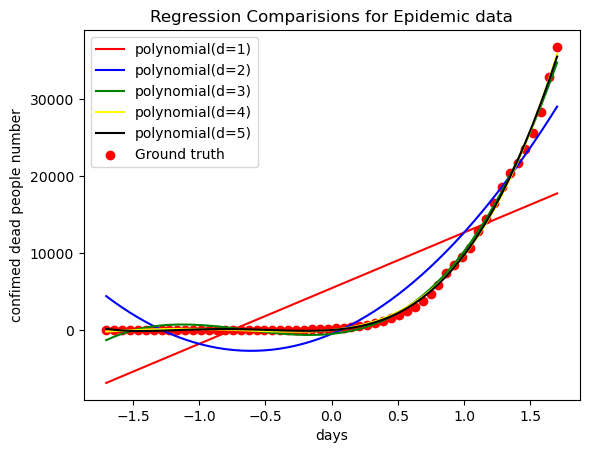

In [6]:
#使用管道、多项式疫情数据拟合
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import sklearn.pipeline as pl
from sklearn.pipeline import Pipeline

n = "countrydata.csv"
data =  pd.read_csv(n)
data = data[data['countryName'] == '美国']  #提取美国疫情数据

#选取2020.2~2022.4美国疫情数据共计58天

time=np.array(range(28,86))#处理日期，采用28...85天数编号
co_list= list(data['deadCount'])[28:86]#提取所有死亡人数列表

#print(len(co_list))

%matplotlib inline
X=np.array(time).reshape(-1,1)#根据指定的数值将数据转换为特定的行数和列数,转换成矩阵
y=np.array(co_list).reshape(-1,1)
X=StandardScaler().fit_transform(X)
#划分训练集、测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05,shuffle=False)
y_train = y_train.reshape(-1,1)
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
y_test= y_test.reshape(-1,1)

# #线性回归做拟合
# lr=LinearRegression().fit(X_train,y_train)
# l_pre=lr.predict(X_test)
# #真实数据绘图
# plt.scatter(X,y,c='g',s=1,label='Ground Truth')
# #线性回归拟合
# plt.plot(X_train,lr.predict(X_train),label='Linear Regression')
# plt.plot(X_test,l_pre,c='brown')
# plt.xlabel('days')
# plt.ylabel('confimed dead people number')
# plt.title('Regression Comparisions for Epidemic data')
#性能评估

# print('MSE（linear）:',mean_squared_error(y_test,l_pre))
# print('训练数据集得分(linear)：',lr.score(X_train,y_train))
# print('测试数据集得分(linear):',lr.score(X_test,y_test))


#多项式回归
# 创建模型

def PolynomialRegression(d):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=d)),
        ('std_scale', StandardScaler()),
        ('lin_reg', LinearRegression())
    ])

'''
model = PolynomialRegression(d=4)
model.fit (X, y)
# 求预测值y
pred_y=model.predict(X)
#pred_y = model.predict(X_test)
'''


for i in range(1,6):
    colors= ['red', 'blue', 'green', 'yellow', 'black']
    model = PolynomialRegression(d=i)
    model.fit (X, y)
    # 求预测值y
    pred_y=model.predict(X)
    print('MSE(d=%d):'%i,mean_squared_error(y,pred_y))
    print('训练数据集得分(d=%d)：'%i,model.score(X,y))
    print('测试数据集得分(d=%d):'%i, model.score(X_test,y_test))
    print('得分:', model.score(X,y))
    print('------------------')
    plt.plot(X,pred_y,c=colors[i-1],label=f'polynomial(d={i})')

plt.scatter(X,y,c='r',label='Ground truth')
#plt.scatter(X,pred_y,c='b',label='poly fitting')
# model1 = PolynomialRegression(d=3)
# model2=PolynomialRegression(d=4)
# model3=PolynomialRegression(d=5)
#  model1.fit (X, y)
#  model2.fit (X, y)
#  model3.fit (X, y)
# pred_y1=model1.predict(X)
# pred_y2=model2.predict(X)
# pred_y3=model3.predict(X)

# plt.plot(X,pred_y1,c='blue',label='polynomial(d=3)')
# plt.plot(X,pred_y2,c='blue',label='polynomial(d=4)')
# plt.plot(X,pred_y3,c='blue',label='polynomial(d=5)')

#plt.plot(X_test,pred_y,c='brown')
#print('MSE(d=5):',mean_squared_error(y_test,pred_y))
#print('训练数据集得分(d=5)：',model.score(X_train,y_train))
#print('测试数据集得分(d=5):', model.score(X_test,y_test))
#print('得分:', model.score(X,y))

plt.title('Regression Comparisions for Epidemic data')
plt.xlabel('days')
plt.ylabel('confimed dead people number')
plt.legend()
plt.show ()